In [55]:
#Importing packages for data analysis
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline 

In [56]:
#Getting data
player_data = pd.read_csv('Player.csv')
playerstats_data = pd.read_csv('Player_Stats.csv')
country_data = pd.read_csv('Country.csv')
league_data = pd.read_csv('League.csv')
teamatt_data = pd.read_csv('Team_Attributes.csv')
teams_data = pd.read_csv('Team.csv')

In [57]:
#Taking out relevant columns
#Removing potential for testing
playerstats_datanew = playerstats_data[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing'
                                      , 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration'
                                      , 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                                      'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking',
                                       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                                      'gk_reflexes']]
playerstats_datanew.head(5)
x = playerstats_datanew.drop('overall_rating', 1)
x.head(5)
y = pd.DataFrame(playerstats_datanew.iloc[:, [0]].as_matrix(), columns=['rating'])
y.head(5)
soccer_data = pd.DataFrame(playerstats_datanew)
soccer_data.head(5)
#Check if any fields are null and replace it with NA
x = x.fillna(lambda x: x.median())
y = y.fillna(lambda y: y.median())
#x.isnull().any()
#y.isnull().any()

In [58]:
#Using Pearson Correlation for finding individual importance of a feature wrt label
soccer_data.corr(method='pearson')

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.357722,0.329362,0.314148,0.458366,0.361527,0.354373,0.357785,0.349629,0.434972,...,0.431154,0.393214,0.133309,0.165255,0.128794,0.027955,0.004396,0.025695,0.005695,0.005672
crossing,0.357722,1.000000,0.576873,0.369774,0.790149,0.637893,0.809057,0.789132,0.707581,0.681931,...,0.693221,0.571484,0.235115,0.285197,0.275399,-0.603897,-0.595609,-0.349537,-0.597623,-0.601580
finishing,0.329362,0.576873,1.000000,0.373594,0.579359,0.851346,0.784668,0.691186,0.632262,0.337551,...,0.651462,0.720395,-0.284640,-0.229756,-0.260945,-0.479148,-0.465083,-0.287627,-0.470657,-0.473160
heading_accuracy,0.314148,0.369774,0.373594,1.000000,0.548703,0.391684,0.400538,0.321131,0.307628,0.358599,...,0.337210,0.431362,0.461449,0.480491,0.441639,-0.665352,-0.647863,-0.391495,-0.647726,-0.651362
short_passing,0.458366,0.790149,0.579359,0.548703,1.000000,0.640229,0.787984,0.732297,0.692459,0.797475,...,0.765308,0.609538,0.350152,0.415638,0.380952,-0.693317,-0.689524,-0.413298,-0.690698,-0.692921
volleys,0.361527,0.637893,0.851346,0.391684,0.640229,1.000000,0.784353,0.752224,0.682749,0.414046,...,0.689867,0.711829,-0.169052,-0.107039,-0.126511,-0.508785,-0.486989,-0.278979,-0.490944,-0.492964
dribbling,0.354373,0.809057,0.784668,0.400538,0.787984,0.784353,1.000000,0.810390,0.705880,0.574270,...,0.732713,0.657704,0.004106,0.066919,0.046003,-0.652735,-0.650511,-0.427070,-0.653394,-0.656011
curve,0.357785,0.789132,0.691186,0.321131,0.732297,0.752224,0.810390,1.000000,0.797406,0.585679,...,0.726921,0.648501,0.033671,0.095190,0.081195,-0.557166,-0.545762,-0.333481,-0.550661,-0.552296
free_kick_accuracy,0.349629,0.707581,0.632262,0.307628,0.692459,0.682749,0.705880,0.797406,1.000000,0.599071,...,0.697365,0.665836,0.074475,0.134462,0.106927,-0.498807,-0.492144,-0.271070,-0.494812,-0.496334
long_passing,0.434972,0.681931,0.337551,0.358599,0.797475,0.414046,0.574270,0.585679,0.599071,1.000000,...,0.669191,0.475927,0.439663,0.494095,0.462089,-0.456252,-0.459630,-0.248678,-0.461114,-0.462668


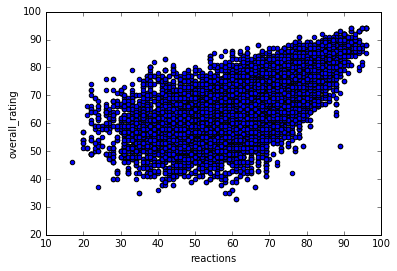

In [59]:
#Positive correlation
soccer_data.plot.scatter( x = 'reactions', y = 'overall_rating')

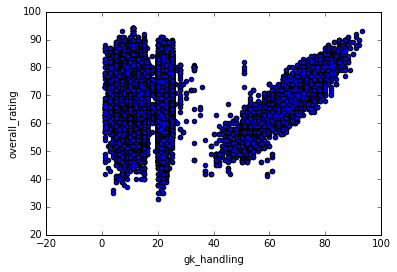

In [60]:
#No correlation
soccer_data.plot.scatter( x = 'gk_handling', y = 'overall_rating')

In [61]:
#Splitting main dataset into test and train
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from numpy import genfromtxt, savetxt

x_train, x_test = train_test_split(playerstats_datanew, test_size = 0.3)
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())
#print(x_test)

In [64]:
#Putting all features and labels in array
#Removing potential from here
cols = ['crossing', 'finishing', 'heading_accuracy', 'short_passing'
                                      , 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration'
                                      , 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                                      'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking',
                                       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                                      'gk_reflexes'] 
colsRes = ['overall_rating']
#Creating train feature and label arrays
trainArr = x_train.as_matrix(cols)
trainRes = x_train.as_matrix(colsRes)

#Training
rf = RandomForestRegressor(n_estimators=20)
y = trainRes.ravel()
train_y = np.array(y).astype(int)

#Fitting
rf.fit(trainArr, train_y)

#Displaying weight scores of features
print("Features sorted by importance:")
resu = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), cols), 
             reverse=True)
print(pd.DataFrame(resu, columns = ['Feature', 'Score']))
#for row in resu:
 #  print(pd.DataFrame(row))

Features sorted by importance:
    Feature               Score
0    0.5678           reactions
1    0.1144        ball_control
2    0.0702     standing_tackle
3    0.0292             marking
4    0.0268           gk_diving
5    0.0215    heading_accuracy
6    0.0211      gk_positioning
7    0.0168         gk_reflexes
8    0.0155           finishing
9    0.0121         gk_handling
10   0.0106         positioning
11   0.0101            strength
12   0.0096            crossing
13   0.0093           dribbling
14   0.0086          shot_power
15   0.0083       interceptions
16   0.0059       short_passing
17   0.0051             stamina
18   0.0044        sprint_speed
19   0.0040          aggression
20   0.0034      sliding_tackle
21   0.0031          long_shots
22   0.0031        acceleration
23   0.0030              vision
24   0.0030        long_passing
25   0.0022             jumping
26   0.0018             volleys
27   0.0017           penalties
28   0.0016          gk_kicking
29   0.00

In [65]:
from sklearn.metrics import mean_squared_error
#Testing
#Creating test features and label arrays
testArr = x_test.as_matrix(cols)
testRes = x_test.as_matrix(colsRes)
#Predicting test data
results = rf.predict(testArr)
#Calculating mean square error
mse = mean_squared_error(testRes, results)
print("MSE: %.4f" % mse)
#Putting newly predicted values in test dataset
x_test['predictions'] = results
#Displaying the original and predicted values together
x_test[['overall_rating', 'predictions']].head(10)

MSE: 0.9772


,overall_rating,predictions
106105,65.0,64.3500
13022,60.0,59.5000
142570,70.0,68.1500
164045,63.0,62.6500
124276,79.0,78.9500
102011,55.0,55.0000
116421,73.0,73.9875
111420,86.0,86.0000
129618,72.0,70.6500
83746,66.0,65.6000


In [66]:
#Using 11 features and finding the relative accuracy
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

#cols = ['reactions', 'potential', 'ball_control', 'standing_tackle', 'gk_diving'
     #, 'heading_accuracy', 'gk_positioning', 'positioning', 'strength', 'crossing', 'marking']
#With potential, cols should be this
cols = ['reactions', 'ball_control', 'standing_tackle', 'gk_diving', 'marking', 'gk_positioning',
         'heading_accuracy', 'finishing', 'gk_handling', 'strength', 'positioning']
colsRes = ['overall_rating']
#Creating train feature and label arrays
trainArr = x_train.as_matrix(cols)
trainRes = x_train.as_matrix(colsRes)
testArr = x_test.as_matrix(cols)
testRes = x_test.as_matrix(colsRes)
y = trainRes.ravel()
train_y = np.array(y).astype(int)

#Fit data
linear_reg.fit(trainArr, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
from sklearn.metrics import mean_squared_error

#Predicting using linear regression and calculating MSE
y_err = linear_reg.predict(testArr)
mse = mean_squared_error(testRes, y_err)
print("MSE: %.3f" % mse)

#Putting newly predicted values in test dataset
x_test['linear_predictions'] = y_err
#Displaying the original and predicted values together
x_test[['overall_rating', 'linear_predictions']].head(10)

MSE: 11.698


,overall_rating,linear_predictions
106105,65.0,63.285681
13022,60.0,62.264895
142570,70.0,71.203742
164045,63.0,68.804139
124276,79.0,76.176751
102011,55.0,60.650119
116421,73.0,73.180222
111420,86.0,79.886541
129618,72.0,71.019209
83746,66.0,65.650736


In [68]:
#Using random forest to predict values
rf = RandomForestRegressor(n_estimators=20)
#Fitting
rf.fit(trainArr, train_y)
#Predicting test data
results = rf.predict(testArr)
#Calculating mean square error
mse = mean_squared_error(testRes, results)
print("MSE: %.4f" % mse)
#Putting newly predicted values in test dataset
x_test['random_predictions'] = results
#Displaying the original and predicted values together
x_test[['overall_rating', 'random_predictions']].head(10)

MSE: 1.5305


,overall_rating,random_predictions
106105,65.0,63.1500
13022,60.0,58.8400
142570,70.0,69.3000
164045,63.0,63.4000
124276,79.0,79.0000
102011,55.0,55.4000
116421,73.0,74.8875
111420,86.0,86.0000
129618,72.0,69.3000
83746,66.0,65.9000


In [69]:
#Using 3-Nearest Neighbours
nn = KNeighborsRegressor(n_neighbors=3)
#Fitting
nn.fit(trainArr, train_y)
#Predicting test data
results = nn.predict(testArr)
#Calculating mean square error
mse = mean_squared_error(testRes, results)
print("MSE: %.4f" % mse)
#Putting newly predicted values in test dataset
x_test['nearest_predictions'] = results
#Displaying the original and predicted values together
x_test[['overall_rating', 'nearest_predictions']].head(10)

MSE: 2.3845


,overall_rating,nearest_predictions
106105,65.0,63.666667
13022,60.0,61.000000
142570,70.0,68.333333
164045,63.0,64.333333
124276,79.0,79.000000
102011,55.0,55.333333
116421,73.0,74.333333
111420,86.0,86.000000
129618,72.0,73.000000
83746,66.0,66.000000


In [73]:
x_test[['overall_rating', 'predictions', 'linear_predictions', 'random_predictions', 'nearest_predictions']].head(20)

,overall_rating,predictions,linear_predictions,random_predictions,nearest_predictions
106105,65.0,64.3500,63.285681,63.150000,63.666667
13022,60.0,59.5000,62.264895,58.840000,61.000000
142570,70.0,68.1500,71.203742,69.300000,68.333333
164045,63.0,62.6500,68.804139,63.400000,64.333333
124276,79.0,78.9500,76.176751,79.000000,79.000000
102011,55.0,55.0000,60.650119,55.400000,55.333333
116421,73.0,73.9875,73.180222,74.887500,74.333333
111420,86.0,86.0000,79.886541,86.000000,86.000000
129618,72.0,70.6500,71.019209,69.300000,73.000000
83746,66.0,65.6000,65.650736,65.900000,66.000000


In [71]:
#Preparing data for other models
cols = ['reactions', 'ball_control', 'standing_tackle', 'gk_diving', 'marking', 'gk_positioning',
         'heading_accuracy', 'finishing', 'gk_handling', 'strength', 'positioning']
colsRes = ['overall_rating']
trainArr1 = x_train.as_matrix(cols)
trainRes1 = x_train.as_matrix(colsRes)
y = trainRes1.ravel()
train_y1 = np.array(y).astype(int)

In [72]:
# Finding accuracy using other models
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
nn3_model = KNeighborsRegressor(n_neighbors=3)
nn5_model = KNeighborsRegressor(n_neighbors=5)
nn7_model = KNeighborsRegressor(n_neighbors=7)
nn9_model = KNeighborsRegressor(n_neighbors=9)
decision_tree = tree.DecisionTreeRegressor()
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
#poly4 = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
#poly5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])
rf = RandomForestRegressor()
li = LinearRegression()
models = [ {'name' : '3-Nearest Neighbors', 'estimator' : nn3_model},
          {'name' : '5-Nearest Neighbors', 'estimator' : nn5_model},
          {'name' : '7-Nearest Neighbors', 'estimator' : nn7_model},
          {'name' : '9-Nearest Neighbors', 'estimator' : nn9_model},
          {'name' : 'Decision Tree', 'estimator' : decision_tree},
          {'name' : 'Polynomial 2nd degree', 'estimator' : poly2},
          {'name' : 'Polynomial 3rd degree', 'estimator' : poly3},
          {'name' : 'Random Forest', 'estimator' : rf},
          {'name' : 'Linear Regression', 'estimator': li}
         ]
for model in models:
    scores = cross_val_score(model['estimator'], trainArr1, train_y1, cv=10, scoring='r2' )
    print(" %s Accuracy: %0.3f (+/- %0.3f)" % (model['name'], scores.mean(), scores.std() * 2))

 3-Nearest Neighbors Accuracy: 0.949 (+/- 0.003)
 5-Nearest Neighbors Accuracy: 0.944 (+/- 0.003)
 7-Nearest Neighbors Accuracy: 0.940 (+/- 0.004)
 9-Nearest Neighbors Accuracy: 0.938 (+/- 0.004)
 Decision Tree Accuracy: 0.944 (+/- 0.005)
 Polynomial 2nd degree Accuracy: 0.911 (+/- 0.005)
 Polynomial 3rd degree Accuracy: 0.926 (+/- 0.004)
 Random Forest Accuracy: 0.965 (+/- 0.003)
 Linear Regression Accuracy: 0.765 (+/- 0.011)
